## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import pandas as pd

%matplotlib inline

## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

# Loading the training Dataset

In [134]:
#Reading the training dataset h5py file
df = h5py.File("Dataset/train_catvnoncat.h5")
#content in h5py file
list(df)

['list_classes', 'train_set_x', 'train_set_y']

In [135]:
classes=df['list_classes'][:]
print("Classes in train dataset",classes)

Classes in train dataset [b'non-cat' b'cat']


In [136]:
#Training datasize
train_set_x=df['train_set_x'][:]
train_set_x.shape
#209 images , each size 64*64*3

(209, 64, 64, 3)

In [137]:
train_set_label=df['train_set_y'][:]
train_set_label=train_set_label.reshape((1,len(train_set_label)))
train_set_label.shape
#Label of each example

(1, 209)

# Loading the test dataset

In [138]:
#Reading the test dataset h5py file
df = h5py.File("Dataset/test_catvnoncat.h5")
#content in h5py file
list(df)

['list_classes', 'test_set_x', 'test_set_y']

In [139]:
#Training datasize
test_set_x=df['test_set_x'][:]
test_set_x.shape
#50 images , each size 64*64*3

(50, 64, 64, 3)

In [140]:
test_set_label=df['test_set_y'][:]
test_set_label=test_set_label.reshape((1,len(test_set_label)))
test_set_label.shape

(1, 50)

# Displaying an image

Class label b'non-cat'


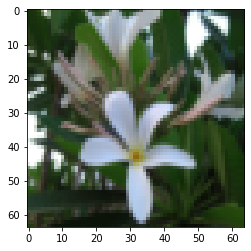

In [141]:
index=9
plt.imshow(train_set_x[index])
print("Class label",df['list_classes'][train_set_label[0][index]])

# Summary of train and test set Data Size

In [142]:
m_train=train_set_x.shape[0]
m_test=test_set_x.shape[0]
num_px=train_set_x.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_label.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_label.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

**Exercise:** Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [143]:
train_x_flatten=train_set_x.reshape(train_set_x.shape[0],-1).T
test_x_flatten=test_set_x.reshape(test_set_x.shape[0],-1).T

In [144]:
print("Flatten Train X Dataset",train_x_flatten.shape)
print("Flatten Test X Dataset",test_x_flatten.shape)
print("Image width*height*channel : ",64*64*3)

Flatten Train X Dataset (12288, 209)
Flatten Test X Dataset (12288, 50)
Image width*height*channel :  12288


# Let's standardize our dataset.

In [145]:
train_x_flatten=train_x_flatten/255.
test_x_flatten=test_x_flatten/255.

In [146]:
def sigmoid(x):
    s=1/(1+np.exp(-x))
    return s

In [147]:
def computez(W,X,b):
    z=np.dot(W.T,X)+b
    return z

In [148]:
def computecost(y,yhat):
    m=y.shape[1]
    cost=(-1/m)*np.sum(y*np.log(yhat)+(1-y)*(np.log(1-yhat)))
    return cost

In [149]:
def forward_propagate(weights,bias,train_x_flatten,train_set_label):
    m=train_x_flatten.shape[1]
    z=computez(weights,train_x_flatten,bias)
    A=sigmoid(z)
    cost=computecost(train_set_label,A)
    dw = (1/m)*np.dot(train_x_flatten,(A-train_set_label).T)
    db = (1/m)*np.sum(A-train_set_label)
    grads={'dw':dw,'db':db}
    return grads,cost

In [150]:
#Test 
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = forward_propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [151]:
def updateparameters(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        grads, cost = forward_propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w-learning_rate*dw
        b = b-learning_rate*db
        costs.append(cost)
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [152]:
#Test
params, grads, costs =updateparameters(w, b, X, Y, num_iterations= 100, learning_rate = 0.009)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


In [153]:
def predict(w,b,X):
    m=X.shape[1]
    y_prediction=np.zeros((1,m))
    w=w.reshape(X.shape[0],1)
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        if A[0][i]>=0.5:
            y_prediction[0][i]=1
        else:
            y_prediction[0][i]=0
    return y_prediction

In [154]:
def model(train_x_flatten,train_set_label,test_x_flatten,test_set_label,alpha,iteration):
   
    w=np.zeros((train_x_flatten.shape[0],1))
    b=0
    
    parameters,grad,costs=updateparameters(w,b,train_x_flatten, train_set_label, iteration,alpha)

     # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
       
    d={'costs':costs,
      'w':w,
      'b':b,
      }

    return d

In [155]:
alpha=0.005
iterations=2000
d=model(train_x_flatten,train_set_label,test_x_flatten,test_set_label,alpha,iterations)

In [156]:
print("alpha =",alpha)
print("Iterations =",iterations)
print("Weights =",d['w'])
print("bias =",d['b'])

alpha = 0.005
Iterations = 2000
Weights = [[ 0.00961402]
 [-0.0264683 ]
 [-0.01226513]
 ...
 [-0.01144453]
 [-0.02944783]
 [ 0.02378106]]
bias = -0.01590624399969298


In [157]:
# Predict test/train set examples (≈ 2 lines of code)
w=d['w']
b=d['b']
costs=d['costs']
Y_prediction_train = predict(w,b,train_x_flatten)
Y_prediction_test = predict(w,b,test_x_flatten)

In [158]:
print("Train Accuracy ",100-np.sum(np.abs(Y_prediction_train-train_set_label)),"%")
print("Test Accuracy ",100-np.sum(np.abs(Y_prediction_test-test_set_label)),"%")

Train Accuracy  98.0 %
Test Accuracy  85.0 %


Class label b'non-cat'


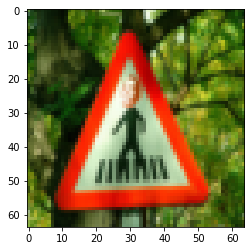

In [159]:
index=14
plt.imshow(test_set_x[index])
print("Class label",df['list_classes'][test_set_label[0][index]])

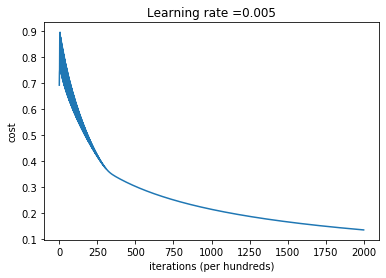

In [172]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" +str(alpha))
plt.show()